In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Data/Merged_Data/precipitat_data_WIZNA_1951_2019.csv')

In [3]:
data.describe()

,station_ID,year,month,total_precip,SUMN_status,n_snow_fall,LDS_status,max_precip,MAXO_status,first_day_max_precip,last_day_max_precip,n_snow_cover,LDPS_status
count,828.0,828.00000,828.000000,828.00000,0.0,828.000000,0.0,828.000000,1.0,827.000000,21.000000,828.0,720.0
mean,253220190.0,1985.00000,6.500000,46.53599,NaN,3.039855,NaN,13.894444,8.0,15.206771,20.761905,0.0,8.0
std,0.0,19.92853,3.454139,31.72937,NaN,4.299783,NaN,10.395919,NaN,8.902189,8.092619,0.0,0.0
min,253220190.0,1951.00000,1.000000,0.00000,NaN,0.000000,NaN,0.000000,8.0,1.000000,7.000000,0.0,8.0
25%,253220190.0,1968.00000,3.750000,24.80000,NaN,0.000000,NaN,7.200000,8.0,8.000000,14.000000,0.0,8.0
50%,253220190.0,1985.00000,6.500000,39.75000,NaN,0.000000,NaN,11.000000,8.0,15.000000,24.000000,0.0,8.0
75%,253220190.0,2002.00000,9.250000,60.15000,NaN,5.250000,NaN,17.750000,8.0,23.000000,26.000000,0.0,8.0
max,253220190.0,2019.00000,12.000000,255.30000,NaN,23.000000,NaN,90.700000,8.0,31.000000,31.000000,0.0,8.0


The field "total_precip", which is the most importan from this analysis point of view, has no missing values.
Only one field has a missing value: firsr_day_max_precip

# Data visualisation
Let's see how the line plot of Total monthly precipitation looks like

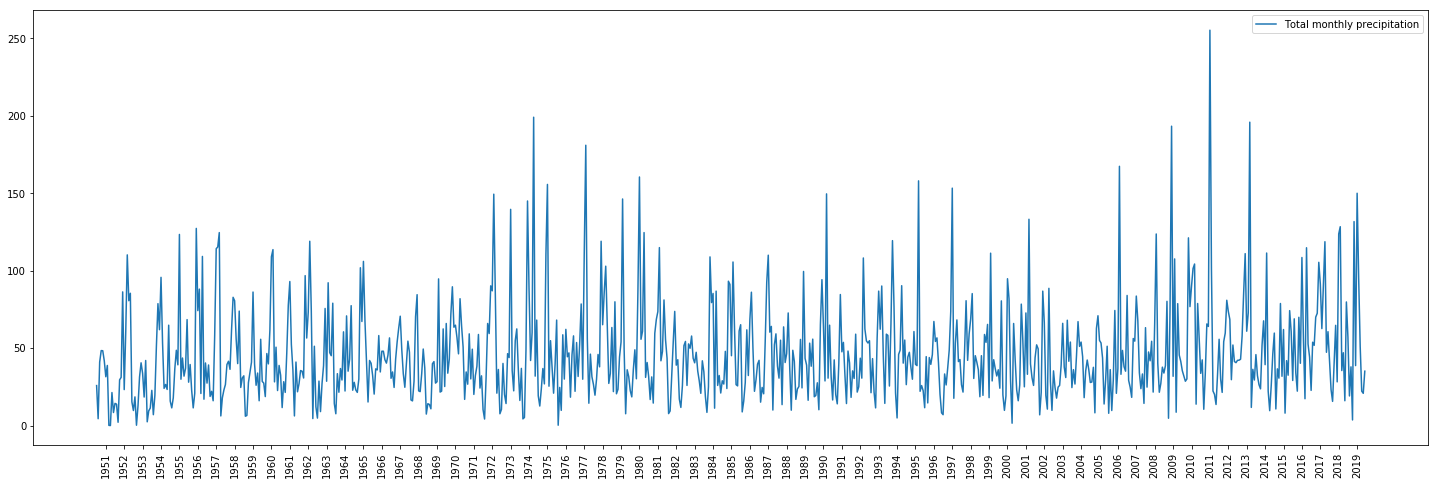

In [29]:
plt.figure(figsize=(25, 8))
x = data.index
y = data.total_precip
x_labels_index = data.iloc[6::12].index
x_label = data.iloc[6::12]['year']
plt.xticks(x_labels_index, x_label, rotation=90) 
plt.plot(x, y, label='Total monthly precipitation')
plt.legend()
plt.show()

### Figure 1. Lineplot of Total monthly precipitation over the years

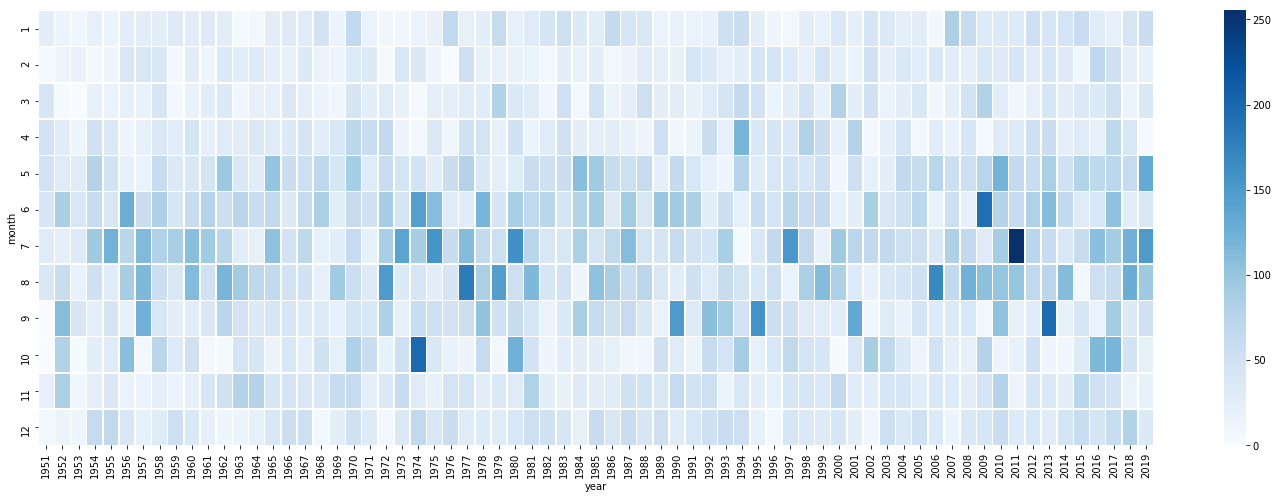

In [4]:
# heat map
data_for_heatmap = data.pivot('month', 'year', 'total_precip')
plt.figure(figsize=(25,8))
sns.heatmap(data_for_heatmap, linewidths=0.5, cmap='Blues') # cmap='Blues'
plt.show()

### Figure 2. Heatmap of total monthly precipitation 
<br/>
No evident trend can be seen in the Figure 1 and Figure 2. The maximum values of Total monthly precipitation can be observed  
over recent 13 years during summer months but this does not prove existance of trend.

## Searching for trend
Let's investigate the Total yearly precipitation

In [37]:
total_yearly_precip = data.groupby(['year'])['total_precip'].sum().reset_index()

In [38]:
total_yearly_precip

,year,total_precip
0,1951,309.8
1,1952,552.3
2,1953,230.4
3,1954,529.1
4,1955,503.8
5,1956,599.0
6,1957,582.7
7,1958,594.0
8,1959,404.9
9,1960,585.3


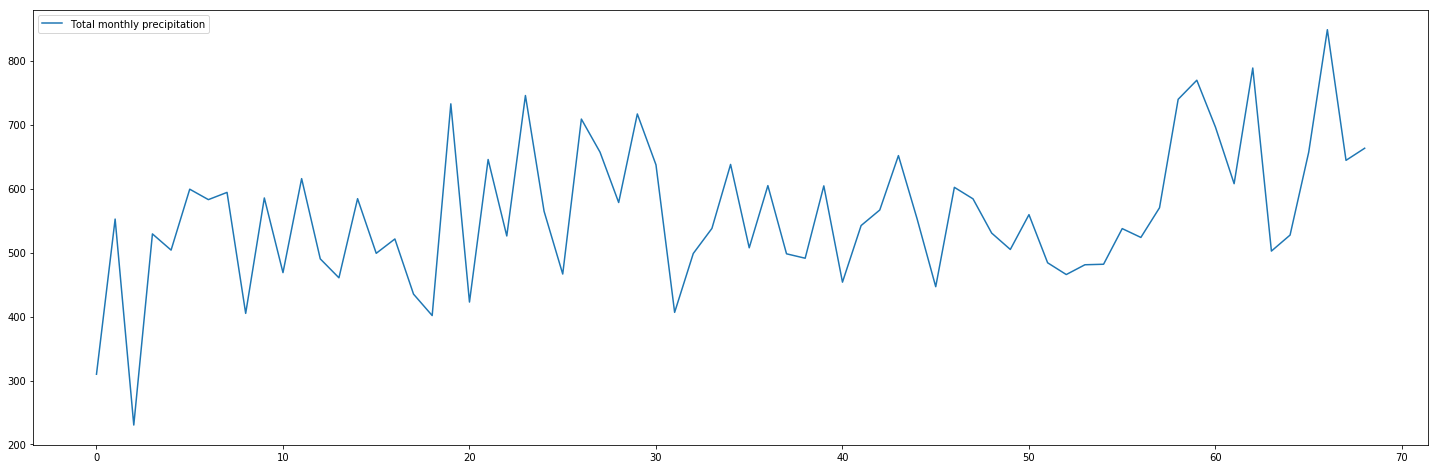

In [39]:
plt.figure(figsize=(25, 8))
x_yearly = total_yearly_precip.index
y_yearly = total_yearly_precip.total_precip
x_yearly_labels_index = total_yearly_precip.index
x_yearly_label = total_yearly_precip['year']
# plt.xticks(x_labels_index, x_label, rotation=90) 
plt.plot(x_yearly, y_yearly, label='Total monthly precipitation')
plt.legend()
plt.show()

In [41]:
from statsmodels.tsa.stattools import adfuller

In [50]:
# piszemy funkcję, która pozwoli wizualnie przedstawić średnią kroczącą i odchylenie standardowe kroczące
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(12).mean() #średnia ruchoma z okresu 12 miesięcy(przesuwająca się o jeden zawsze)
    rolstd = timeseries.rolling(12).std() #odchylenie standardowe z okresu 12 miesięcy
    #Plot rolling statistics:
    plt.figure(figsize=(25,8));
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    print('Results of Dickey-Fuller Test:')

    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

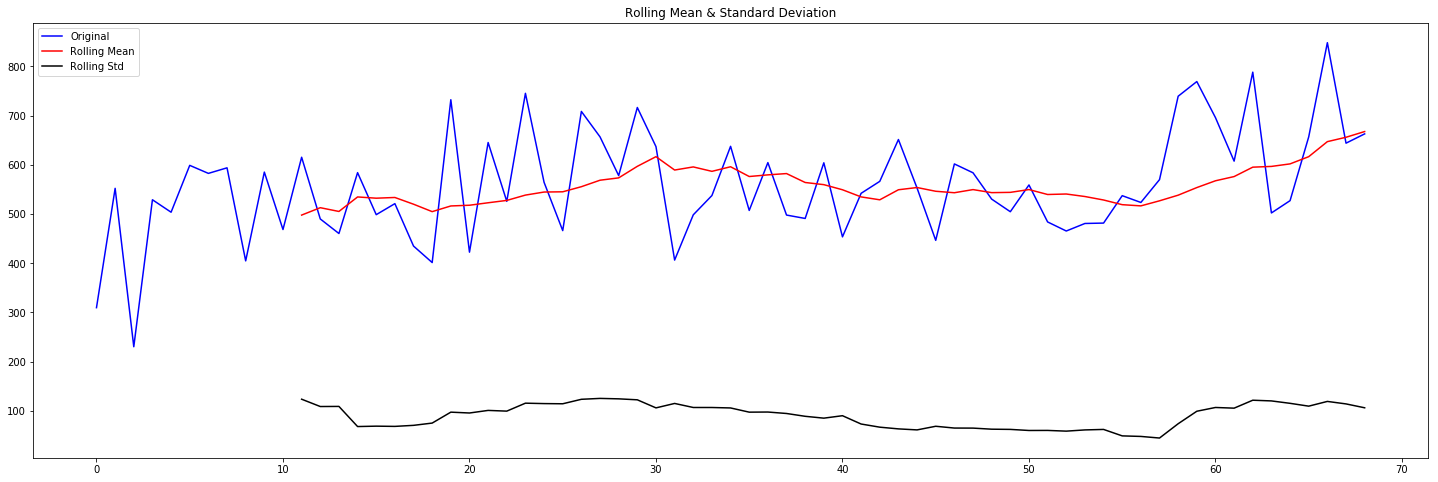

Results of Dickey-Fuller Test:
Test Statistic                -7.321721e+00
p-value                        1.189361e-10
#Lags Used                     0.000000e+00
Number of Observations Used    6.800000e+01
Critical Value (1%)           -3.530399e+00
Critical Value (5%)           -2.905087e+00
Critical Value (10%)          -2.590001e+00
dtype: float64


In [51]:
test_stationarity(total_yearly_precip['total_precip'])

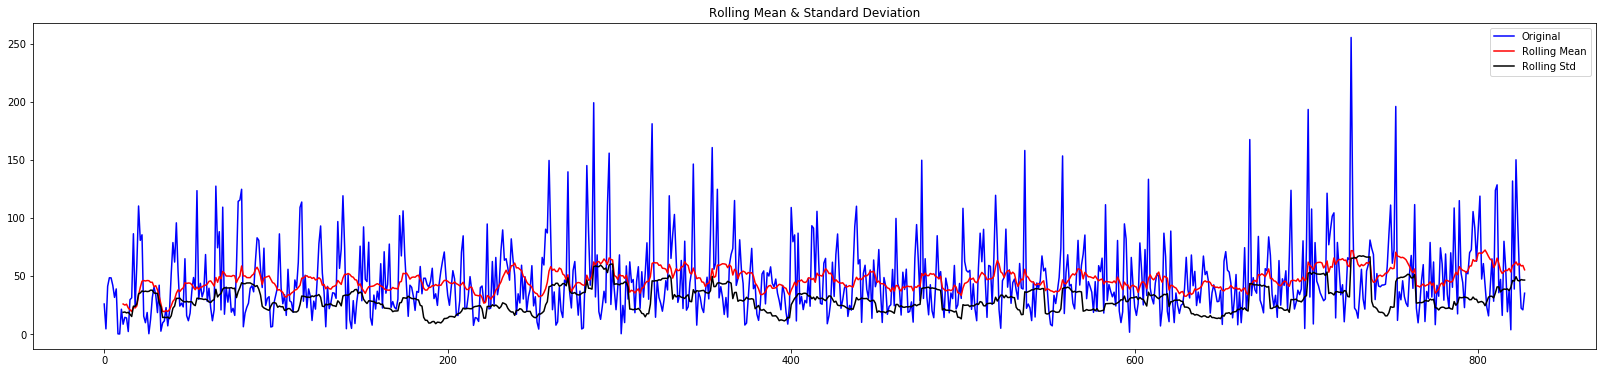

Results of Dickey-Fuller Test:
Test Statistic                -6.624051e+00
p-value                        5.937436e-09
#Lags Used                     1.500000e+01
Number of Observations Used    8.120000e+02
Critical Value (1%)           -3.438429e+00
Critical Value (5%)           -2.865106e+00
Critical Value (10%)          -2.568669e+00
dtype: float64


In [49]:
test_stationarity(data['total_precip'])

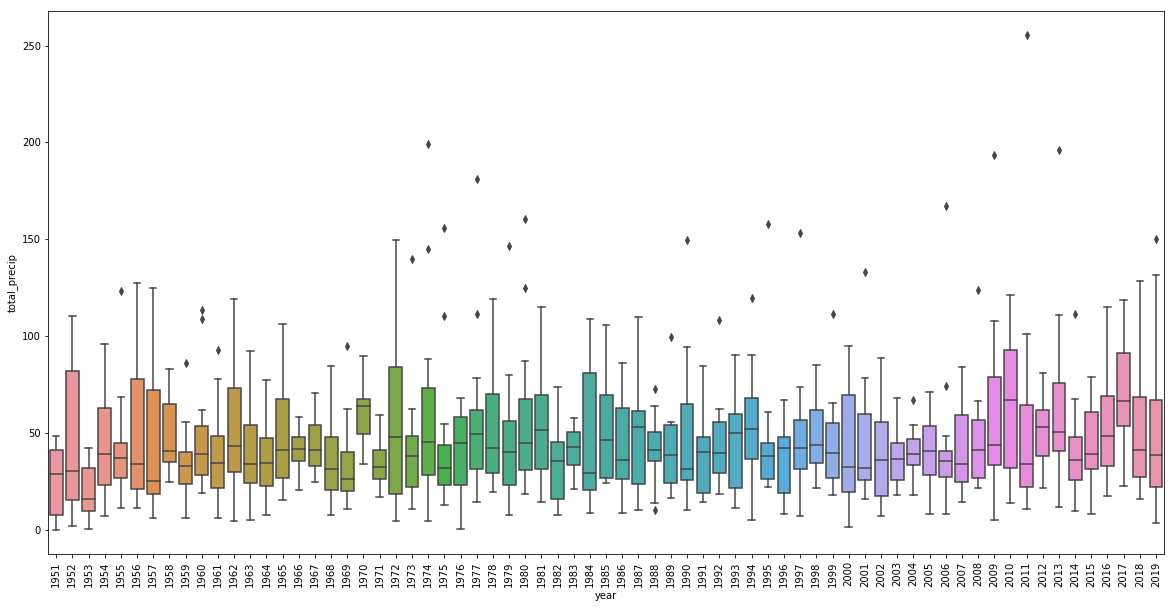

In [80]:
# temp_series = data
plt.figure(figsize=(20,10))
precip_boxplot = sns.boxplot(data.year, data.total_precip)
x_labels = pd.DataFrame(pd.unique(data['year'])).rename({0:'year'}, axis=1)
# # x_labels = data.groupby(['year']).count()
plt.xticks(x_labels.index, x_labels.year, rotation=90) 
plt.show()